In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

mnist_test = dset.MNIST("",train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  7


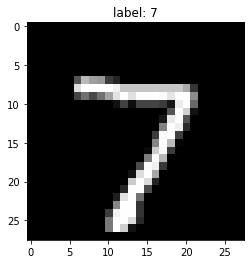

In [33]:
print("mnist_test 길이:", len(mnist_test))

image, label = mnist_test.__getitem__(0)
print("image data 형태:",image.size())
print("label: ",label)

image = image.numpy()
plt.title("label: %d" %label)
plt.imshow(image[0], cmap='gray')
plt.show()

In [34]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [35]:
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
        self.b1 = np.zeros((n_hidden1), dtype=np.float32)

        self.W2 = np.zeros((n_hidden2, n_hidden1),dtype=np.float32)
        self.b2 = np.zeros((n_hidden2),dtype=np.float32)

        self.W3 = np.zeros((n_hidden2, n_output), dtype=np.float32)
        self.b3 = np.zeros((n_output), dtype=np.float32)
    
    def __cell__(self, x):
        x=x.reshape(-1)

        h1 = sigmoid(np.dot(self.W1,x)+self.b1)
        h2 = np.dot(self.W2,h1)+self.b2
        out = np.dot(self.W3, h2)+self.b3

        return softmax(out)

In [36]:
model = MyMLP(28*28, 256, 128, 10)
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(128, 10) (10,)


In [37]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.W2 = weights['W2']
model.W3 = weights['W3']
model.b1 = weights['b1']
model.b2 = weights['b2']
model.b3 = weights['b3']

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


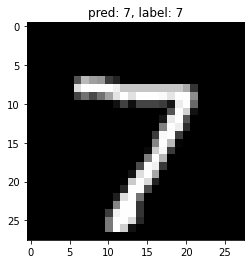

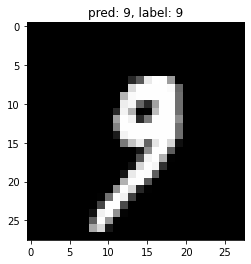

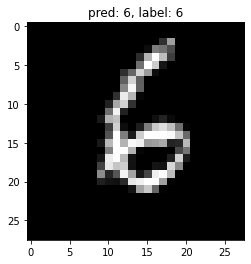

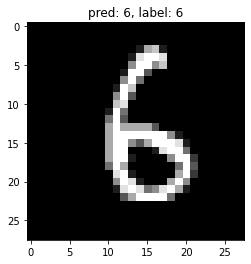

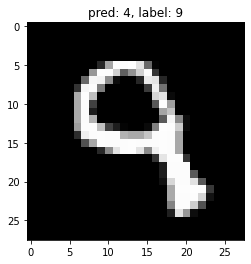

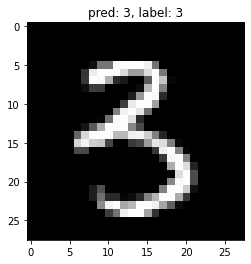

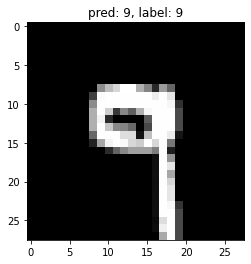

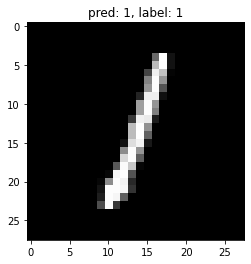

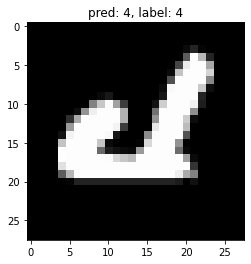

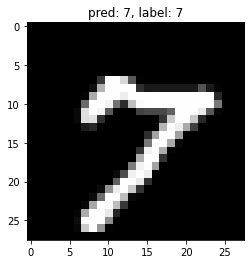

9191
정확도: 91.91


In [106]:
mysum = 0

m=len(mnist_test)
cnt = 0

for i in range(m):
    image, label = mnist_test.__getitem__(i)
    output = model.__cell__(image)

    if(i % 1000==0):
        img = image.numpy()
        pred_label = np.argmax(output)
        plt.title('pred: %d, label: %d' %(pred_label, label))
        plt.imshow(img[0], cmap='gray')
        plt.show()

    cnt+=1
    mysum+=(np.argmax(output)==label)
print(mysum)
print('정확도: %.2f' %((float(mysum)/cnt)*100.0))